In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st 

In [28]:
df = pd.read_csv("SuperStore_Orders.csv", encoding='latin1')  # atau cp1252
print(df.head())

          order_id  order_date   ship_date       ship_mode    customer_name  \
0     AG-2011-2040  01-01-2011  06-01-2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
2     HU-2011-1220  01-01-2011  05-01-2011    Second Class    Annie Thurman   
3  IT-2011-3647632  01-01-2011  05-01-2011    Second Class     Eugene Moren   
4    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage      

In [29]:
# Melihat statistik deskriptif
print(df.describe())

           quantity      discount        profit  shipping_cost          year
count  51290.000000  51290.000000  51290.000000   51290.000000  51290.000000
mean       3.476545      0.142908     28.641740      26.375915   2012.777208
std        2.278766      0.212280    174.424113      57.296804      1.098931
min        1.000000      0.000000  -6599.978000       0.000000   2011.000000
25%        2.000000      0.000000      0.000000       2.610000   2012.000000
50%        3.000000      0.000000      9.240000       7.790000   2013.000000
75%        5.000000      0.200000     36.810000      24.450000   2014.000000
max       14.000000      0.850000   8399.976000     933.570000   2014.000000


In [30]:
# Mengecek data yang Null
print(df.isnull().sum())

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


In [31]:
# Cek tipe data dan jumlah data kosong
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [32]:
df.head(n=5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


##### Penjualan Per Kategori

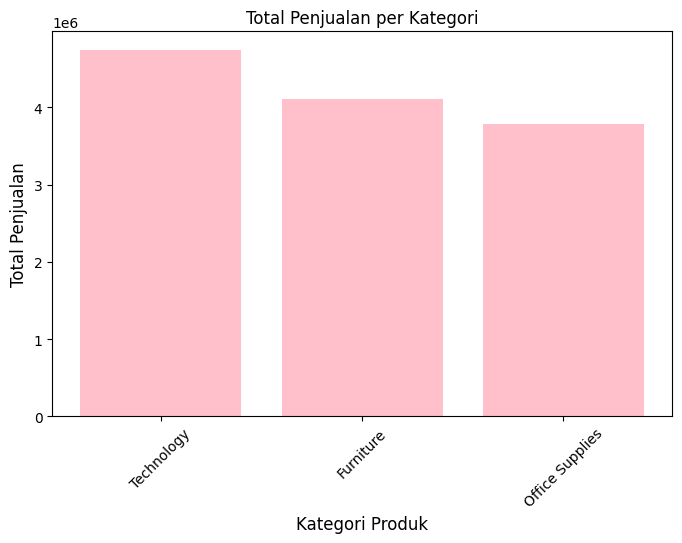

In [33]:
# Ubah sales ke float jika masih string
df['sales'] = df['sales'].replace(',', '', regex=True).astype(float)

# Hitung total penjualan per kategori
sales_per_category = df.groupby('category')['sales'].sum().reset_index()

# Urutkan dari penjualan tertinggi
sales_per_category = sales_per_category.sort_values(by='sales', ascending=False)

# Plot grafik batang
plt.figure(figsize=(8, 5))
plt.bar(sales_per_category['category'], sales_per_category['sales'], color='pink')
plt.title('Total Penjualan per Kategori')
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45)  # agar label tidak bertabrakan
plt.show()

##### Penjualan Produk Kategori Technology

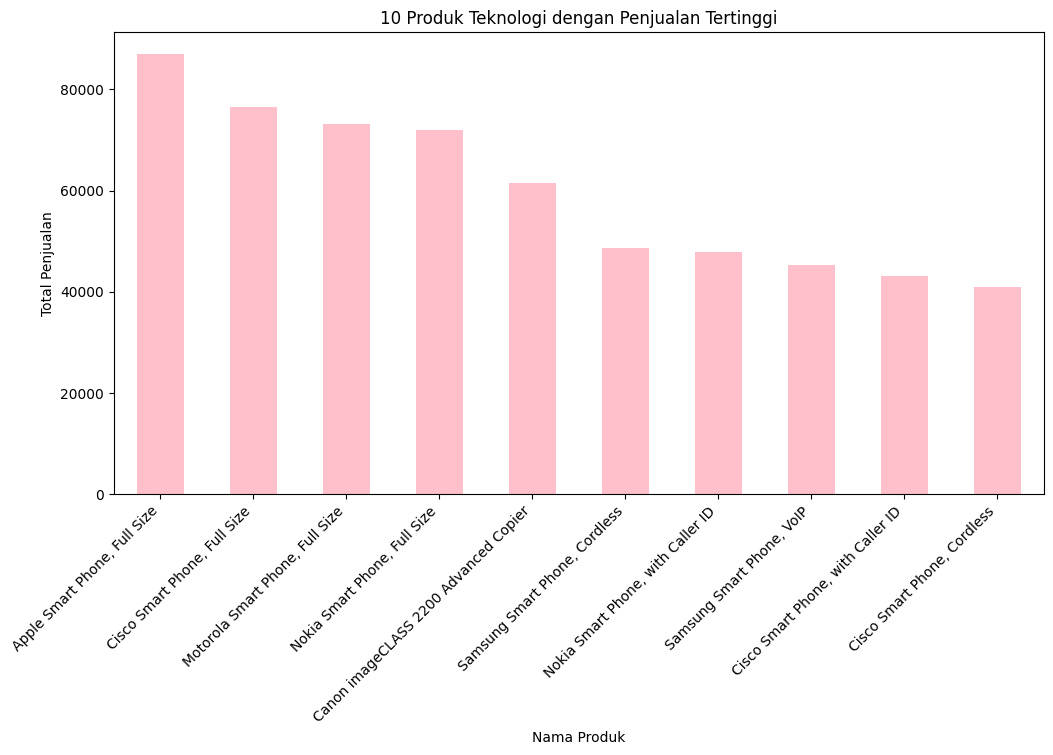

In [34]:
# Filter data untuk kategori Technology
tech_products = df[df['category'] == 'Technology']

# Kelompokkan berdasarkan nama produk dan jumlahkan penjualannya
sales_per_tech_product = tech_products.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)  # ambil top 10

# Plot bar chart
plt.figure(figsize=(12, 6))
sales_per_tech_product.plot(kind='bar', color='Pink')

plt.title('10 Produk Teknologi dengan Penjualan Tertinggi')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')  # agar label produk tidak menumpuk
plt.show()

##### Penjualan Produk Kategori Furniture

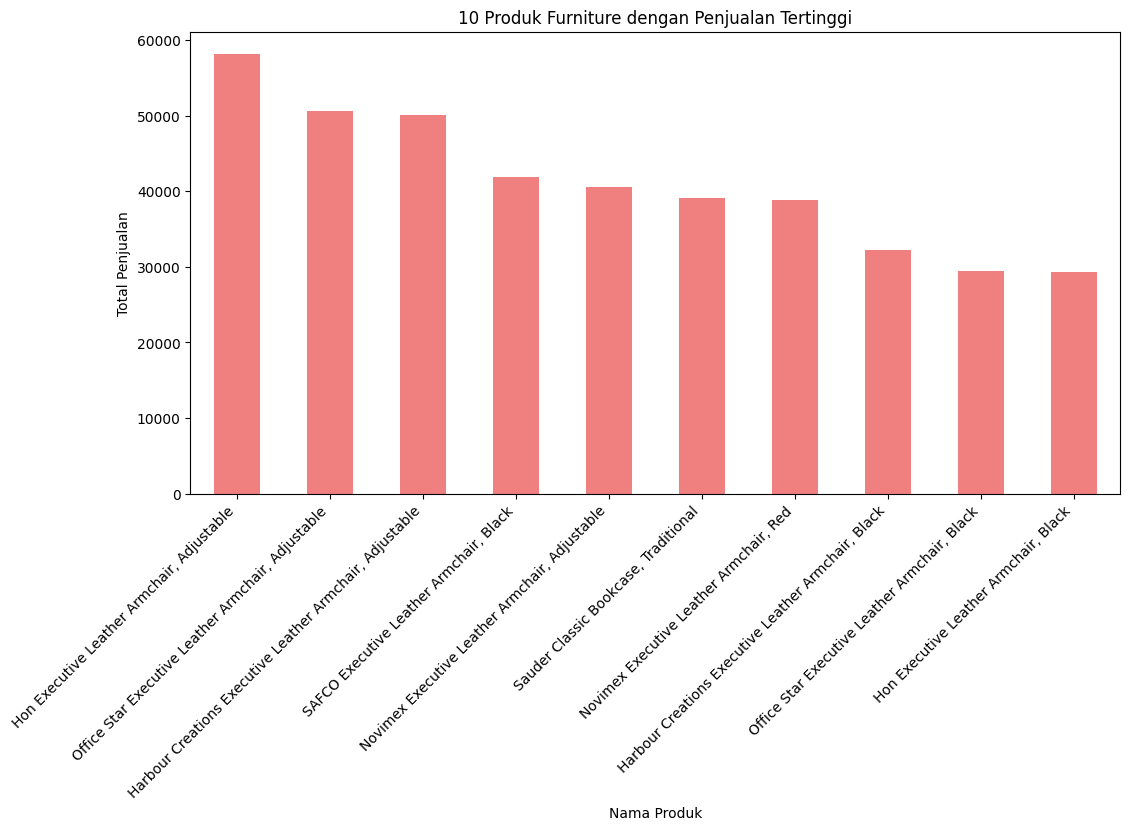

In [35]:
# Filter data untuk kategori Furniture
furniture_products = df[df['category'] == 'Furniture']

# Kelompokkan berdasarkan nama produk dan jumlahkan penjualannya
sales_per_furniture_product = furniture_products.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)  # ambil top 10

# Plot bar chart
plt.figure(figsize=(12, 6))
sales_per_furniture_product.plot(kind='bar', color='lightcoral')

plt.title('10 Produk Furniture dengan Penjualan Tertinggi')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')  # agar label produk tidak menumpuk
plt.show()

##### Penjualan Produk Kategori Office Supplies

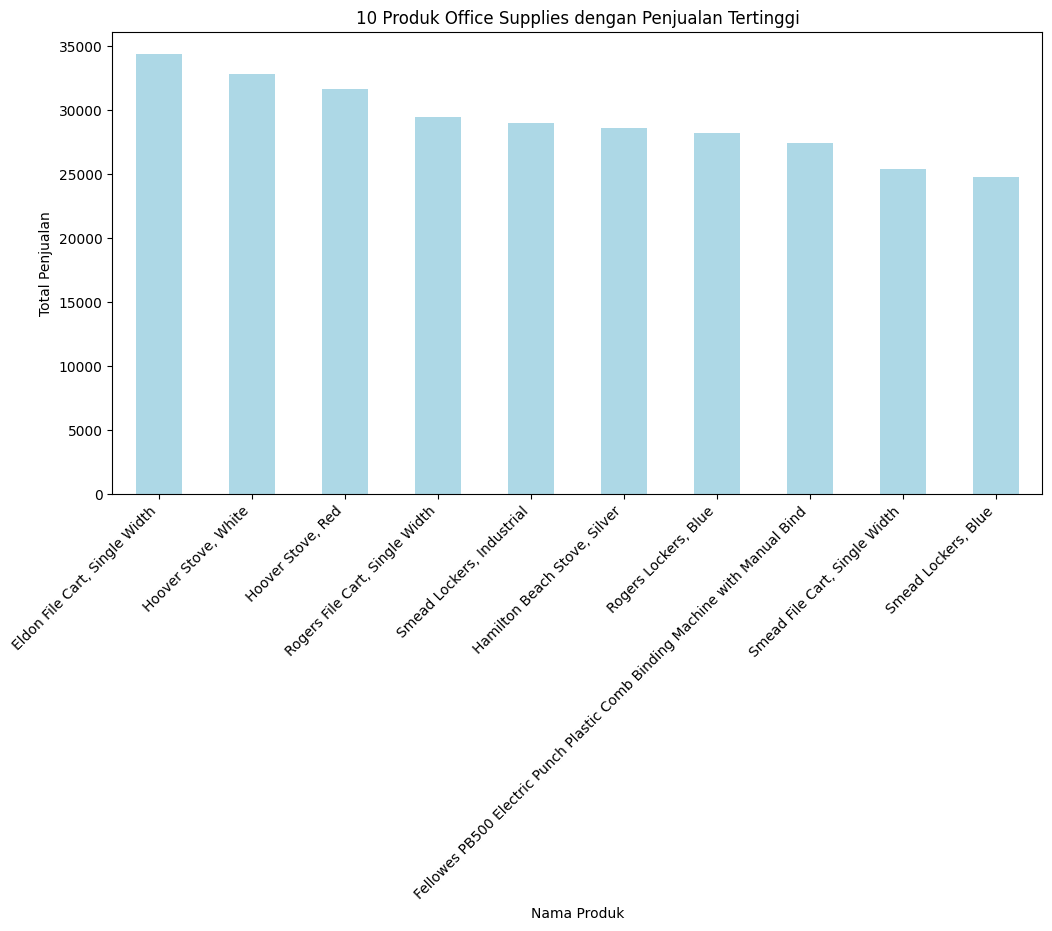

In [36]:
# Filter data untuk kategori Office Supplies
office_products = df[df['category'] == 'Office Supplies']

# Kelompokkan berdasarkan nama produk dan jumlahkan penjualannya
sales_per_office_product = office_products.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)  # ambil top 10

# Plot bar chart
plt.figure(figsize=(12, 6))
sales_per_office_product.plot(kind='bar', color='lightblue')

plt.title('10 Produk Office Supplies dengan Penjualan Tertinggi')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')  # agar label produk tidak menumpuk
plt.show()

##### Penjualan Per Produk

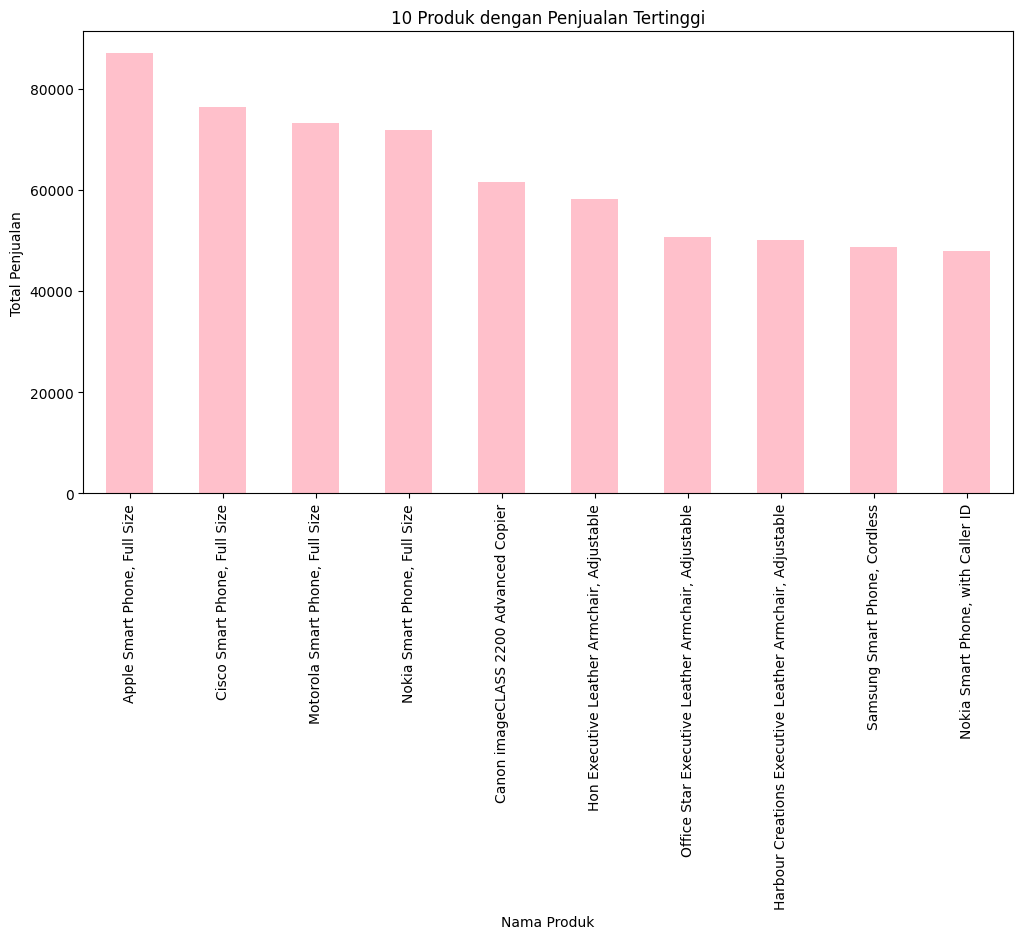

In [37]:
# Mengelompokkan berdasarkan nama produk dan menjumlahkan penjualan
sales_per_product = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)  # top 10 produk terlaris

# Membuat bar chart
plt.figure(figsize=(12, 6))  # Ukuran gambar
sales_per_product.plot(kind='bar', color='pink')

plt.title('10 Produk dengan Penjualan Tertinggi')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan')
plt.show()

##### Negara dengan Penjualan Terbanyak

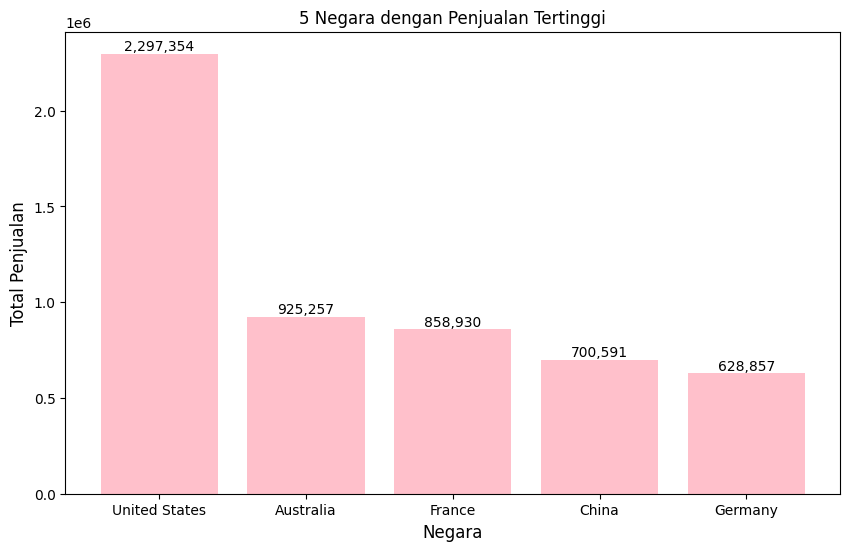

In [38]:
# Menghitung total penjualan per negara
top_countries = df.groupby('country')['sales'].sum().sort_values(ascending=False).head(5)

# Membuat plot bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries.index, top_countries.values, color='pink')

# Menambahkan label dan nama
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"{bar.get_height():,.0f}",  # format angka ribuan
             ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label sumbu
plt.title('5 Negara dengan Penjualan Tertinggi')
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.show()

##### Penjualan di Negara tiap Tahunnya

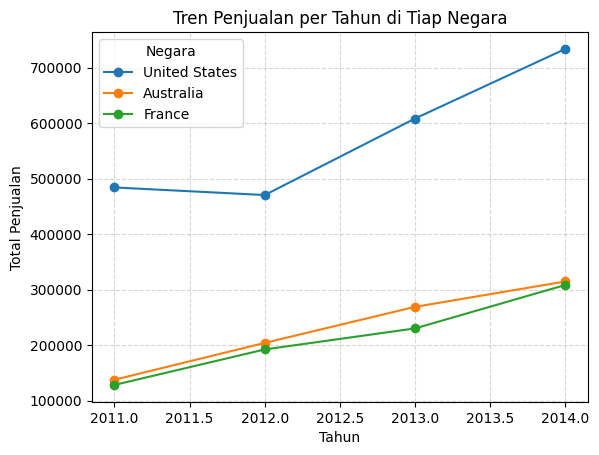

In [39]:
# Ubah kolom tanggal menjadi datetime & yang diambil hanya tahun
df['year'] = pd.to_datetime(df['order_date'], dayfirst=True).dt.year

# Ambil top 3 negara dengan penjualan tertinggi
top_countries = df.groupby('country')['sales'].sum().nlargest(3).index

# Group berdasarkan negara dan tahun
grouped = df[df['country'].isin(top_countries)].groupby(['year', 'country'])['sales'].sum().reset_index()

# Plot manual tiap negara
for country in top_countries:
    data = grouped[grouped['country'] == country]
    plt.plot(data['year'], data['sales'], marker='o', label=country)

plt.title('Tren Penjualan per Tahun di Tiap Negara')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Negara')
plt.show()

##### Tren Penjualan dari waktu ke waktu

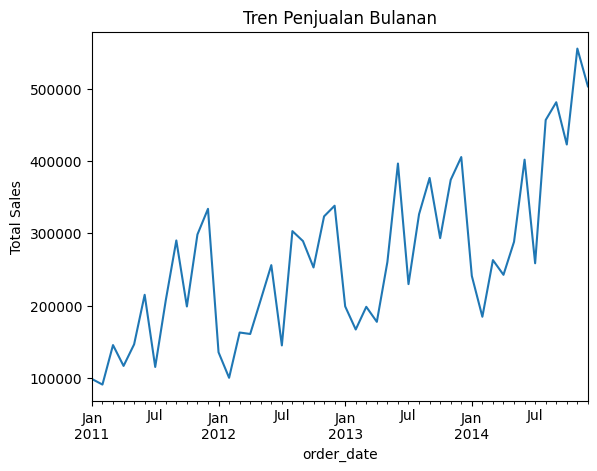

In [40]:
# Melihat tren penjualan menggunakan orded date
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
sales_trend = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum()
sales_trend.plot(title='Tren Penjualan Bulanan')
plt.ylabel('Total Sales')
plt.show()

##### Penjualan Produk di United States

In [41]:
# Filter data untuk negara United States
us_data = df[df['country'] == 'United States']

# Kelompokkan berdasarkan nama produk dan jumlahkan penjualannya
sales_per_product_us = us_data.groupby('product_name')['sales'].sum().sort_values(ascending=False)

# Tampilkan hasil
print(sales_per_product_us)

product_name
Canon imageCLASS 2200 Advanced Copier                                          61600.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27454.0
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.0
HON 5400 Series Task Chairs for Big and Tall                                   21870.0
GBC DocuBind TL300 Electric Binding System                                     19824.0
                                                                                ...   
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                                 8.0
Grip Seal Envelopes                                                                7.0
Xerox 20                                                                           6.0
Avery 5                                                                            6.0
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   2.0
Name: sales, Length: 1841, dty

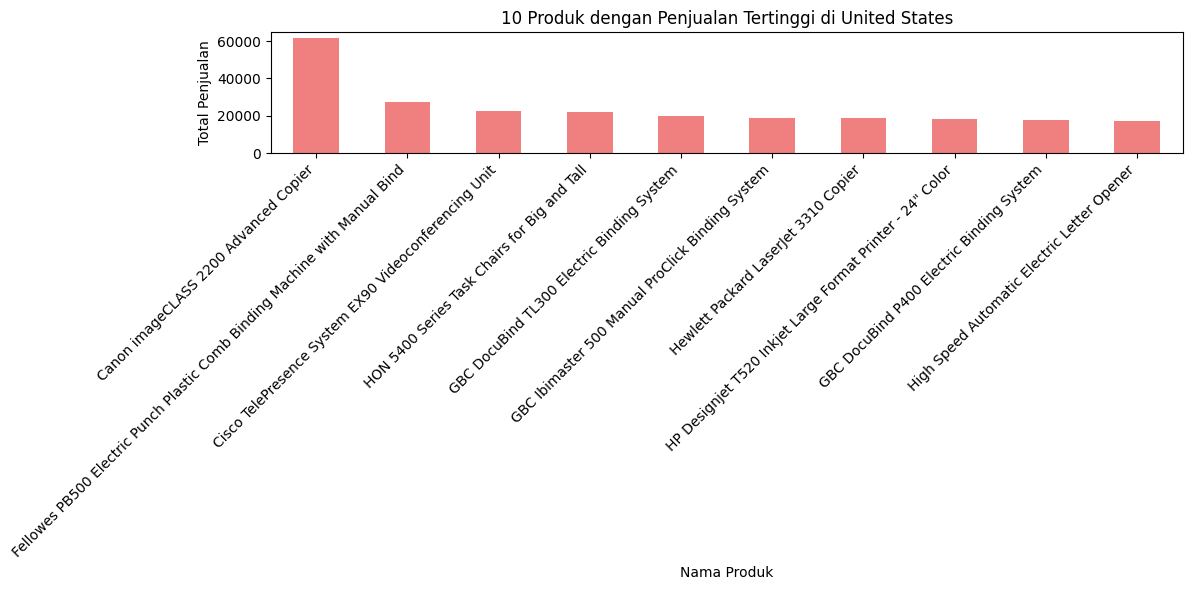

In [42]:
# Ambil 10 produk terlaris
top10_us_products = sales_per_product_us.head(10)

# Plot
plt.figure(figsize=(12, 6))
top10_us_products.plot(kind='bar', color='lightcoral')

plt.title('10 Produk dengan Penjualan Tertinggi di United States')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Ukuran Pemusatan (Central Tendency)

In [62]:
# Pastikan kolom 'sales' numerik
df['sales'] = df['sales'].replace('[\$,]', '', regex=True).astype(float)

# Hitung statistik
print("Mean untuk Kolom Sales:", np.mean(df['sales']))
print("Median untuk Kolom Sales:", np.median(df['sales']))
print("Modus untuk Kolom Sales:", st.mode(df['sales']))
print("Variance untuk Kolom Sales:", np.var(df['sales']))
print("Range (PTP)untuk Kolom Sales:", np.ptp(df['sales']))

Mean untuk Kolom Sales: 246.49844024176252
Median untuk Kolom Sales: 85.0
Modus untuk Kolom Sales: 13.0
Variance untuk Kolom Sales: 237717.1149225038
Range (PTP)untuk Kolom Sales: 22638.0


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\71478\AppData\Local\Temp\ipykernel_18932\602484006.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['sales'] = df['sales'].replace('[\$,]', '', regex=True).astype(float)


##### Ukuran Penyebaran (Dispersion)

In [53]:
# Ukuran Penyebaran
variance_sales = df['sales'].var()
print("Variance:", variance_sales)
std_dev_sales = df['sales'].std()
print("Standard Deviation:", std_dev_sales)
range_sales = df['sales'].max() - df['sales'].min()
print("Range:", range_sales)
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
iqr_sales = Q3 - Q1
print("IQR:", iqr_sales)

Variance: 237721.74977822183
Standard Deviation: 487.5671746315802
Range: 22638.0
IQR: 220.0


##### Uji Normalitas

In [54]:
from scipy.stats import shapiro

stat, p = shapiro(df['sales'])
print("Shapiro-Wilk Stat:", stat)
print("p-value:", p)
if p > 0.05:
    print("Data berdistribusi normal")
else:
    print("Data TIDAK berdistribusi normal")

Shapiro-Wilk Stat: 0.4668483089753003
p-value: 1.7341844972662318e-144
Data TIDAK berdistribusi normal


C:\Users\71478\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51290.
  res = hypotest_fun_out(*samples, **kwds)


##### Visualisasi Statistik

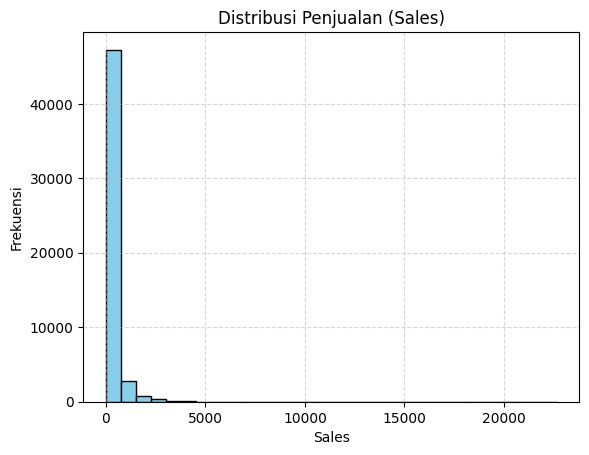

In [55]:
plt.hist(df['sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Penjualan (Sales)')
plt.xlabel('Sales')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

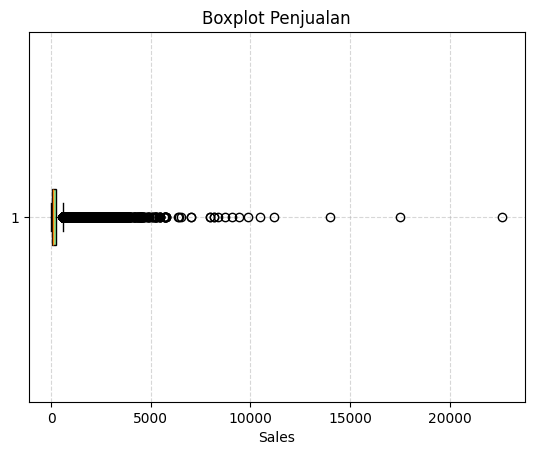

In [57]:
# Boxplot untuk melihat outlier
plt.boxplot(df['sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot Penjualan')
plt.xlabel('Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### Karena banyaknya Outlier, maka dilakukan beberapa analisis

##### Mengidentifikasi dan melihat outlier

In [ ]:
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

# Outlier jika di luar Q1 - 1.5*IQR atau Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]
print("Jumlah outlier:", len(outliers))
print(outliers[['sales']].head())

# Jumlah outliernya ada 5.655 dari 51.290 row

Jumlah outlier: 5655
     sales
8    912.0
9    667.0
12   854.0
27  1648.0
43  3029.0


##### Memisahkan untuk analisis terpisah

In [59]:
normal_data = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]
outlier_data = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]

##### Transformasi Data menggunakan Log

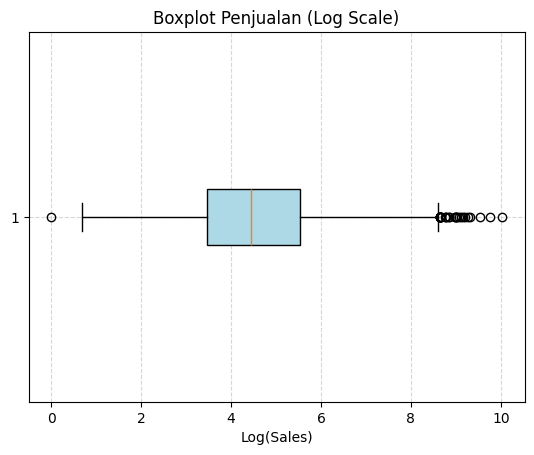

In [64]:
# Kenapa?
# karena log bisa memperkecil nilai yang besar namun nilai yg kecil tetap terjaga

df['log_sales'] = np.log1p(df['sales'])

# Visualisasi boxplot log
plt.boxplot(df['log_sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot Penjualan (Log Scale)')
plt.xlabel('Log(Sales)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### Menghapus Outliernya

In [61]:
df_cleaned = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]


##### Menggunakan Data Biasa untuk membuat HeatMap

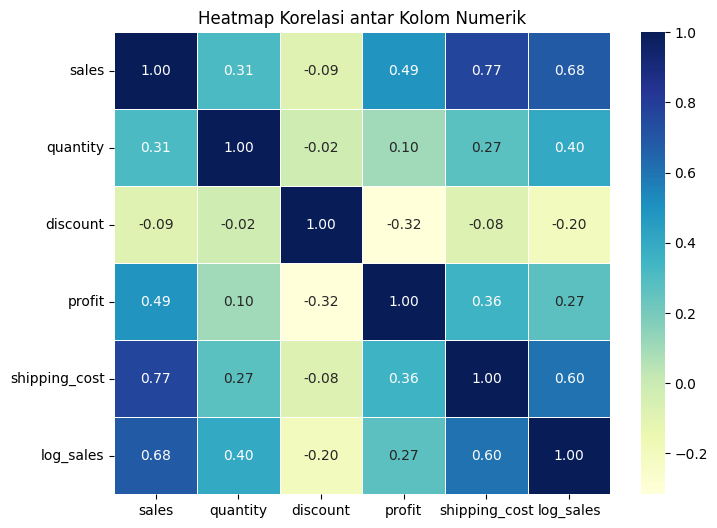

In [74]:
# Ambil hanya kolom numerik (termasuk 'sales')
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom Numerik')
plt.show()
